In [1]:
!pip3 install tensorflow
#2.11.0

In [2]:
import pandas as pd
import os
import numpy as np
import tensorflow as tf
import random
from keras.regularizers import l2
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional ,Activation  ,Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from keras.models import load_model
import random
import time
import tensorflow as tf
tf.random.set_seed(21)
import tensorflow as tf
tf.random.set_seed(21)
import matplotlib.pyplot as plt
import ast
import re
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from keras.layers import Input, Dense, BatchNormalization, Conv2D, MaxPool2D, GlobalMaxPool2D, Dropout
from keras.optimizers import SGD
from keras.models import Model
import pickle

In [3]:
drop = ['status' ,'engagement_medium' ,'message_category', 'campaign_delivery_time' ,'responded_flag' ,'delivery_date',
        'last_batch_nbd' ,'payment_dayofweek' ,'positively_reacted_flag' ,'last_batch_payment_flag','statement_balance_current_limit_percentage',
       'total_clicked_till_prev_date' ,'total_duration_category_BASIC_till_prev_date' ,'risk',
    'total_duration_category_CHARGES_till_prev_date' ,'total_duration_category_CLEAN_till_prev_date' ,
    'total_duration_category_CLEAN TRACK_till_prev_date','city' ,'month' ,'con_' ,
    'last_batch_intensity_till_date' ,'last_batch_overall_max_duration_voiceBot','last_batch_user_clicked_counts_overall' ,
        'smartTEXT_CLEAN TRACK_till_prev_date' ,'smartTEXT_BASIC_till_prev_date' ,'voiceBot_CLEAN TRACK_till_prev_date' ,
        'smartTEXT_BASIC_till_prev_date' ,'voiceBot_CHARGES_till_prev_date' ,'voiceBot_CLEAN_till_prev_date' ,'smartTEXT_CLEAN_till_prev_date',
       'smartTEXT_CLEAN TRACK_till_prev_date' , 'last_batch_payment_dayofweek','voiceBot_CHARGES_on_last_day','voiceBot_CLEAN_on_last_day',
       'city' ,'cumulative_positively_reacted_prev_date' ,'no_of_active_campaign_days_till_prev_date_voiceBot']

In [4]:
#data_1 = pd.read_parquet('final_data_sample_4.parquet')
data = pd.read_parquet('/content/no_payment_data_sample_3.parquet')

In [5]:
data.shape

(85242, 79)

In [6]:
data.shape

(85242, 79)

In [ ]:
#data

In [7]:
data.drop(columns=drop ,inplace=True)
data.shape

(85242, 45)

In [8]:
data.columns

Index(['loan_account_no', 'batch_no', 'content_language', 'age', 'principal_outstanding', 'NBD', 'intensity_till_prev_date', 'cumulative_responded_prev_date', 'cumulative_reacted_prev_date', 'avg_intensity_till_prev_date', 'intensity_till_prev_date_smartTEXT', 'cumulative_responded_prev_date_smartTEXT', 'cumulative_reached_prev_date_smartTEXT', 'avg_intensity_till_prev_date_smartTEXT', 'intensity_till_prev_date_voiceBot', 'cumulative_reached_prev_date_voiceBot', 'cumulative_responded_prev_date_voiceBot', 'avg_intensity_till_prev_date_voiceBot', 'max_duration_prev_day_voiceBot', 'avg_duration_prev_day_voiceBot', 'voiceBot_BASIC_till_prev_date', 'voiceBot_BASIC_on_last_day', 'voiceBot_CLEAN TRACK_on_last_day', 'smartTEXT_BASIC_on_last_day', 'smartTEXT_CLEAN_on_last_day', 'smartTEXT_CLEAN TRACK_on_last_day', 'voiceBot_BASIC_responded_till_prev_date', 'voiceBot_CHARGES_responded_till_prev_date', 'voiceBot_CLEAN_responded_till_prev_date', 'voiceBot_CLEAN TRACK_responded_till_prev_date',
   

In [9]:
data['content_language'] = data['content_language'].apply(lambda x: 1 if x == 'EN' else 0)

In [10]:
data['sequence'] = data['sequence'].apply(lambda x: re.sub('-' ,',' ,x))

In [11]:
sc = StandardScaler()
data[['principal_outstanding']] = sc.fit_transform(data[['principal_outstanding']])

In [12]:
column_to_move = data.pop("NBD")
data.insert(2, "NBD", column_to_move)

In [13]:
data.head(10)

,loan_account_no,batch_no,NBD,content_language,age,principal_outstanding,intensity_till_prev_date,cumulative_responded_prev_date,cumulative_reacted_prev_date,avg_intensity_till_prev_date,intensity_till_prev_date_smartTEXT,cumulative_responded_prev_date_smartTEXT,cumulative_reached_prev_date_smartTEXT,avg_intensity_till_prev_date_smartTEXT,intensity_till_prev_date_voiceBot,cumulative_reached_prev_date_voiceBot,cumulative_responded_prev_date_voiceBot,avg_intensity_till_prev_date_voiceBot,max_duration_prev_day_voiceBot,avg_duration_prev_day_voiceBot,voiceBot_BASIC_till_prev_date,voiceBot_BASIC_on_last_day,voiceBot_CLEAN TRACK_on_last_day,smartTEXT_BASIC_on_last_day,smartTEXT_CLEAN_on_last_day,smartTEXT_CLEAN TRACK_on_last_day,voiceBot_BASIC_responded_till_prev_date,voiceBot_CHARGES_responded_till_prev_date,voiceBot_CLEAN_responded_till_prev_date,voiceBot_CLEAN TRACK_responded_till_prev_date,smartTEXT_BASIC_responded_till_prev_date,smartTEXT_CLEAN_responded_till_prev_date,smartTEXT_CLEAN TRACK_responded_till_prev_date,last_batch_campaign_duration,last_batch_last_day_react,last_batch_cumulative_reacted,last_batch_cumulative_reached_voiceBot,last_batch_cumulative_reacted_voiceBot,last_batch_cumulative_reached_smartTEXT,total_reach_last_day,total_respond_last_day,total_react_last_day,max_positively_reacted_flag,sequence,target
0,124000000630044,870,0,1,28,-0.786955,12.0,3.0,0.0,3.0,9.0,0.0,9.0,2.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,0.0,1,"START,",SMS-12-CLEAN
1,124000000630044,870,0,1,28,-0.786955,12.0,3.0,0.0,3.0,9.0,0.0,9.0,2.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,0.0,0,"START,SMS,12,CLEAN,2,",SMS-12-CLEAN
2,124000000630044,870,0,1,28,-0.786955,12.0,3.0,0.0,3.0,9.0,0.0,9.0,2.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,0.0,0,"START,SMS,12,CLEAN,2,SMS,12,CLEAN,2,",SMS-12-CLEAN
3,124000000630044,870,0,1,28,-0.786955,12.0,3.0,0.0,3.0,9.0,0.0,9.0,2.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,0.0,0,"START,SMS,12,CLEAN,2,SMS,12,CLEAN,2,SMS,12,CLE...",STOP
4,124000000630044,870,2,1,28,-0.786955,9.0,3.0,0.0,3.0,6.0,0.0,6.0,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,0.0,1,"START,",SMS-10-CLEAN
5,124000000630044,870,2,1,28,-0.786955,9.0,3.0,0.0,3.0,6.0,0.0,6.0,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,0.0,0,"START,SMS,10,CLEAN,2,",SMS-10-CLEAN
6,124000000630044,870,2,1,28,-0.786955,9.0,3.0,0.0,3.0,6.0,0.0,6.0,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,0.0,0,"START,SMS,10,CLEAN,2,SMS,10,CLEAN,2,",SMS-10-CLEAN
7,124000000630044,870,2,1,28,-0.786955,9.0,3.0,0.0,3.0,6.0,0.0,6.0,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,0.0,0,"START,SMS,10,CLEAN,2,SMS,10,CLEAN,2,SMS,10,CLE...",STOP
8,124000000630044,870,4,1,28,-0.786955,6.0,2.0,0.0,3.0,4.0,0.0,4.0,2.00,2.0,2.0,2.0,1.0,7.0,7.0,2.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,0.0,1,"START,",SMS-12-BASIC
9,124000000630044,870,4,1,28,-0.786955,6.0,2.0,0.0,3.0,4.0,0.0,4.0,2.00,2.0,2.0,2.0,1.0,7.0,7.0,2.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,0.0,0,"START,SMS,12,BASIC,2,",SMS-12-BASIC


In [14]:
data['target'].value_counts()

STOP                  25144
IVR-17-BASIC           2688
IVR-12-BASIC           2446
SMS-12-CLEAN           2370
SMS-13-BASIC           2335
SMS-12-BASIC           2271
SMS-11-CLEAN           2020
IVR-16-BASIC           2003
SMS-10-CLEAN           1973
IVR-11-CLEAN           1969
SMS-14-BASIC           1673
IVR-16-CLEAN           1648
SMS-13-CLEAN_TRACK     1520
IVR-17-CLEAN           1465
IVR-16-CLEAN_TRACK     1458
SMS-13-CLEAN           1422
SMS-9-CLEAN            1397
IVR-15-CLEAN_TRACK     1393
IVR-18-BASIC           1274
IVR-12-CLEAN           1203
IVR-14-CLEAN           1196
IVR-13-CLEAN           1178
SMS-12-CLEAN_TRACK     1160
IVR-12-CLEAN_TRACK     1144
IVR-14-BASIC           1133
IVR-15-BASIC           1112
SMS-17-BASIC           1048
SMS-11-BASIC            966
IVR-13-CLEAN_TRACK      965
IVR-11-CLEAN_TRACK      950
IVR-13-BASIC            941
SMS-14-CLEAN_TRACK      833
SMS-14-CLEAN            765
IVR-10-CLEAN_TRACK      739
IVR-11-BASIC            734
IVR-9-CLEAN         

In [15]:
data.fillna(0 ,inplace=True)
data['seq_2'] = data.apply(lambda x : [x[i] for i in data.columns if i not in ['sequence' ,'target' ,'content_language']] ,axis = 1)
data = data[['seq_2' ,'sequence' ,'target' ,'content_language']]
#data['sequence'] = data['sequence'].apply(lambda x: x.split(':'))
data['sequence'] = data['sequence'].apply(lambda x: x.split(','))
data['sequence'] = data['sequence'].apply(lambda x: [i.strip() for i in x])
display(len(data['target'].value_counts()))
list1 = []
list1.append('START')
list1.append('STOP')
for i in data['sequence']:
    list1.extend(i)
p = list(set(list1))
word_int = {}
int_word = {}
display(len(p))
for i in range(len(set(list1))):
    word_int[p[i]] = i
    int_word[str(i)] = p[i]

80

28

In [16]:
word_int['CL_TRACK'] = word_int['CLEAN_TRACK']
del int_word[str(word_int['CL_TRACK'])]
int_word[str(word_int['CL_TRACK'])] = 'CL_TRACK'

In [17]:
word_int

{'': 0,
 '19': 1,
 '2': 2,
 '13': 3,
 '2.1': 4,
 'CLEAN': 5,
 '3.5': 6,
 '18': 7,
 '16': 8,
 'CLEAN_TRACK': 9,
 '3.2': 10,
 '12': 11,
 '14': 12,
 '3.3': 13,
 '11': 14,
 '3.1': 15,
 '17': 16,
 '15': 17,
 'BASIC': 18,
 'START': 19,
 '10': 20,
 'CHARGES': 21,
 '9': 22,
 '3': 23,
 '8': 24,
 'SMS': 25,
 'IVR': 26,
 'STOP': 27,
 'CL_TRACK': 9}

In [18]:
b = ch = cl = c = st = 0

for i in data['sequence']:
    for j in i:
        if j == 'CLEAN':
            c += 1
        if j == 'CLEAN_TRACK':
            cl += 1
        if j == 'CHARGES' :
            ch += 1
        if j == 'BASIC' :
            b += 1
        if j == 'STOP' :
            st += 1

In [19]:
for i in data['target']:
    if i == 'STOP' :
        st += 1

In [20]:
st

25144

In [21]:
data.head(2)

,seq_2,sequence,target,content_language
0,"[124000000630044, 870, 0, 28, -0.7869548166620...","[START, ]",SMS-12-CLEAN,1
1,"[124000000630044, 870, 0, 28, -0.7869548166620...","[START, SMS, 12, CLEAN, 2, ]",SMS-12-CLEAN,1


In [22]:
data['seq_to_integer'] = data['sequence'].apply(lambda x : [word_int[p] for p in x][:-1])
data['number_array'] = data['seq_2']+data['seq_to_integer']
data['id'] = data['number_array'].apply(lambda x : x[0])
data['batch'] = data['number_array'].apply(lambda x : x[1])
data['number_array'] = data['number_array'].apply(lambda x: x[2:])
data = data[['id', 'batch' ,'number_array' ,'target' ,'content_language']]
data['target_char'] = data['target']


In [23]:
data

,id,batch,number_array,target,content_language,target_char
0,124000000630044,870,"[0, 28, -0.7869548166620305, 12.0, 3.0, 0.0, 3...",SMS-12-CLEAN,1,SMS-12-CLEAN
1,124000000630044,870,"[0, 28, -0.7869548166620305, 12.0, 3.0, 0.0, 3...",SMS-12-CLEAN,1,SMS-12-CLEAN
2,124000000630044,870,"[0, 28, -0.7869548166620305, 12.0, 3.0, 0.0, 3...",SMS-12-CLEAN,1,SMS-12-CLEAN
3,124000000630044,870,"[0, 28, -0.7869548166620305, 12.0, 3.0, 0.0, 3...",STOP,1,STOP
4,124000000630044,870,"[2, 28, -0.7869548166620305, 9.0, 3.0, 0.0, 3....",SMS-10-CLEAN,1,SMS-10-CLEAN
...,...,...,...,...,...,...
202484,4111460601960150,722,"[7, 30, 0.3752809663240724, 0.0, 0.0, 0.0, 0.0...",SMS-13-BASIC,1,SMS-13-BASIC
202485,4111460601960150,722,"[7, 30, 0.3752809663240724, 0.0, 0.0, 0.0, 0.0...",IVR-13-BASIC,1,IVR-13-BASIC
202486,4111460601960150,722,"[7, 30, 0.3752809663240724, 0.0, 0.0, 0.0, 0.0...",IVR-15-BASIC,0,IVR-15-BASIC
202487,4111460601960150,722,"[7, 30, 0.3752809663240724, 0.0, 0.0, 0.0, 0.0...",IVR-17-BASIC,0,IVR-17-BASIC


In [24]:
data['NBD'] = data['number_array'].apply(lambda x : x[0])

In [25]:
#data.loc[0]['number_array']
len(np.unique(data.id))

4000

In [26]:
id = shuffle(np.unique(data.id)[:20000])
data = data[data['id'].isin(id)]

In [27]:
data['target'] = data['target'].apply(lambda x: [i.strip() for i in x.split('-')])
p = data['target'].apply(lambda x : len(x))
data['target'] = data['target'].apply(lambda x : ['BASIC' if 'BASIC' in i else i for i in x ])
data['target'] = data['target'].apply(lambda x : ['CL_TRACK' if 'CLEAN_TRACK' in i else i for i in x ])
data['target'] = data['target'].apply(lambda x : ['CHARGES' if 'CHARGES' in i else i for i in x ])
data['target'] = data['target'].apply(lambda x : ['CLEAN' if 'CLEAN' in i else i for i in x ])


In [28]:
p = []
for i in data['target']:
    p.extend(i)
data['target'] = data['target'].apply(lambda x: [i[:-1] if ',' in i else i for i in x ])
data['target'] = data['target'].apply(lambda x: [word_int[i.strip()] for i in x])
data['target'] = data['target'].apply(lambda x : '-'.join([str(i) for i in x]))


In [29]:
data

,id,batch,number_array,target,content_language,target_char,NBD
0,124000000630044,870,"[0, 28, -0.7869548166620305, 12.0, 3.0, 0.0, 3...",25-11-5,1,SMS-12-CLEAN,0
1,124000000630044,870,"[0, 28, -0.7869548166620305, 12.0, 3.0, 0.0, 3...",25-11-5,1,SMS-12-CLEAN,0
2,124000000630044,870,"[0, 28, -0.7869548166620305, 12.0, 3.0, 0.0, 3...",25-11-5,1,SMS-12-CLEAN,0
3,124000000630044,870,"[0, 28, -0.7869548166620305, 12.0, 3.0, 0.0, 3...",27,1,STOP,0
4,124000000630044,870,"[2, 28, -0.7869548166620305, 9.0, 3.0, 0.0, 3....",25-20-5,1,SMS-10-CLEAN,2
...,...,...,...,...,...,...,...
202484,4111460601960150,722,"[7, 30, 0.3752809663240724, 0.0, 0.0, 0.0, 0.0...",25-3-18,1,SMS-13-BASIC,7
202485,4111460601960150,722,"[7, 30, 0.3752809663240724, 0.0, 0.0, 0.0, 0.0...",26-3-18,1,IVR-13-BASIC,7
202486,4111460601960150,722,"[7, 30, 0.3752809663240724, 0.0, 0.0, 0.0, 0.0...",26-17-18,0,IVR-15-BASIC,7
202487,4111460601960150,722,"[7, 30, 0.3752809663240724, 0.0, 0.0, 0.0, 0.0...",26-16-18,0,IVR-17-BASIC,7


In [30]:
word_int

{'': 0,
 '19': 1,
 '2': 2,
 '13': 3,
 '2.1': 4,
 'CLEAN': 5,
 '3.5': 6,
 '18': 7,
 '16': 8,
 'CLEAN_TRACK': 9,
 '3.2': 10,
 '12': 11,
 '14': 12,
 '3.3': 13,
 '11': 14,
 '3.1': 15,
 '17': 16,
 '15': 17,
 'BASIC': 18,
 'START': 19,
 '10': 20,
 'CHARGES': 21,
 '9': 22,
 '3': 23,
 '8': 24,
 'SMS': 25,
 'IVR': 26,
 'STOP': 27,
 'CL_TRACK': 9}

In [31]:
#data['target_char'].value_counts()
data['target'].value_counts()

27          25144
26-16-18     2688
26-11-18     2446
25-11-5      2370
25-3-18      2335
25-11-18     2271
25-14-5      2020
26-8-18      2003
25-20-5      1973
26-14-5      1969
25-12-18     1673
26-8-5       1648
25-3-9       1520
26-16-5      1465
26-8-9       1458
25-3-5       1422
25-22-5      1397
26-17-9      1393
26-7-18      1274
26-11-5      1203
26-12-5      1196
26-3-5       1178
25-11-9      1160
26-11-9      1144
26-12-18     1133
26-17-18     1112
25-16-18     1048
25-14-18      966
26-3-9        965
26-14-9       950
26-3-18       941
25-12-9       833
25-12-5       765
26-20-9       739
26-14-18      734
26-22-5       727
26-16-9       727
26-20-5       665
25-14-9       662
26-17-5       526
26-17-21      481
26-24-5       440
25-8-18       416
26-12-9       406
25-17-9       395
25-7-18       388
25-24-5       377
26-12-21      364
25-16-5       354
26-22-9       333
25-22-18      303
25-7-9        256
25-8-9        223
26-22-18      222
26-8-21       207
26-20-18  

In [73]:
#data
test_id = shuffle(np.unique(data.id))[:2000]
train = data[data.id.isin(test_id) == False]
test = data[data.id.isin(test_id)]

In [74]:
len(data.id.unique())

4000

In [75]:
test = test.iloc[15000,:]
test.to_csv('dummy_test_final_sample__1_0.csv')

In [53]:
train['length'] = train['number_array'].apply(lambda x : len(x))
display(train['length'].max())
input_sequence = [i for i in train['number_array']]
len(input_sequence)
input_sequences = np.array(pad_sequences(input_sequence, maxlen=150, padding='pre'))
input_sequence = np.array(input_sequences)
X = input_sequence
X.shape

81

(42379, 150)

In [54]:
#train

In [55]:
y = pd.get_dummies(train['target'])
y1 = pd.get_dummies(train['content_language'])

In [59]:
state_label = list(y.columns)
content_label = list(y1.columns)
len(state_label) ,len(content_label)

(80, 2)

In [60]:
response = [word_int[str(i)] for i in [2,3,2.1,3.1,3.2,3.3,3.4,3.5] if str(i) in word_int]

In [61]:
myvar1 = state_label
myvar2 = word_int
myvar3 = int_word
myvar4 = response
myvar5 = content_label

with open('state_label_sample_input_4_5.pkl', 'wb') as file:
    pickle.dump(myvar1, file)
with open('word_int_sample_input_4_5.pkl', 'wb') as file:
    pickle.dump(myvar2, file)
with open('int_word_sample_input_4_5.pkl', 'wb') as file:
    pickle.dump(myvar3, file)
with open('response_sample_input_4_5.pkl', 'wb') as file:
    pickle.dump(myvar4, file)
with open('content_label_sample_input_4_5.pkl', 'wb') as file:
    pickle.dump(myvar5, file)

## Model Architechure

In [62]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
#model = tf.keras.Sequential()
vocab_size = len(train['target'].value_counts())
sequence_length = 134
input_layer = Input(shape=(X.shape[1], n_features))
_= LSTM(128, activation='relu',kernel_regularizer=l2(0.05), input_shape=(X.shape[1], n_features) ,return_sequences=True)(input_layer)
_ = LSTM(64, activation='relu' ,kernel_regularizer=l2(0.05))(_)
seq = Dense(len(train['target'].value_counts()) ,name='seq' ,activation = 'softmax')(_)
lang = Dense(2 ,activation = 'sigmoid' ,name='lang')(_)
model = Model(inputs=input_layer, outputs=[seq, lang])
model.compile(

    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss={
         "seq": tf.keras.losses.CategoricalCrossentropy(),
        "lang": tf.keras.losses.BinaryCrossentropy(),
    },
    metrics = {"seq" :'accuracy' ,
                   "lang" :'accuracy'}
)

## Model Training

In [65]:
random.seed(21)
n = X.shape[0] // 6
i = 0
k = n
for _ in range(5):
    x = X[i:n]
    print(i ,n ,'dddddddddddddd')
    target = y.iloc[i:n]
    target1 = y1.iloc[i:n]
    i = n
    n = n + k
    print(x.shape)
    history = model.fit(x, [target ,target1], epochs=1, verbose=1 , batch_size = 256 ,validation_split=0.2)
    model.save('model_output_sample_4_5.h5')  # creates a HDF5 file 'my_model.h5'
    #     #returns a compiled model
    #     identical to the previous one
    model = load_model('model_output_sample_4_5.h5')
    time.sleep(20)
    print("### part is done")

0 7063 dddddddddddddd
(7063, 150, 1)
23/23 [==============================] - 27s 1s/step - loss: 12.4388 - seq_loss: 3.8996 - lang_loss: 0.6795 - seq_accuracy: 0.2529 - lang_accuracy: 0.6412 - val_loss: 12.1092 - val_seq_loss: 3.7576 - val_lang_loss: 0.7075 - val_seq_accuracy: 0.2838 - val_lang_accuracy: 0.5018
### part is done
7063 14126 dddddddddddddd
(7063, 150, 1)
23/23 [==============================] - 31s 1s/step - loss: 11.8421 - seq_loss: 3.6953 - lang_loss: 0.6781 - seq_accuracy: 0.3037 - lang_accuracy: 0.6674 - val_loss: 11.5334 - val_seq_loss: 3.6059 - val_lang_loss: 0.6628 - val_seq_accuracy: 0.3093 - val_lang_accuracy: 0.6999
### part is done
14126 21189 dddddddddddddd
(7063, 150, 1)
23/23 [==============================] - 28s 1s/step - loss: 11.3085 - seq_loss: 3.5568 - lang_loss: 0.6517 - seq_accuracy: 0.3120 - lang_accuracy: 0.7189 - val_loss: 11.1129 - val_seq_loss: 3.5718 - val_lang_loss: 0.6331 - val_seq_accuracy: 0.3093 - val_lang_accuracy: 0.7169
### part is don

In [47]:
train

,id,batch,number_array,target,content_language,target_char,NBD,length


In [66]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 150, 1)]             0         []                            
                                                                                                  
 lstm_2 (LSTM)               (None, 150, 128)             66560     ['input_2[0][0]']             
                                                                                                  
 lstm_3 (LSTM)               (None, 64)                   49408     ['lstm_2[0][0]']              
                                                                                                  
 seq (Dense)                 (None, 80)                   5200      ['lstm_3[0][0]']              
                                                                                            

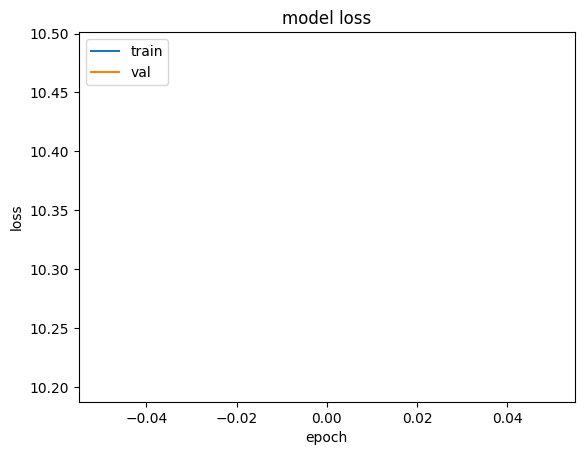

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Load Test Data

In [76]:
test_duumy = pd.read_csv('/dummy_test_final_sample__1_0.csv')
test_duumy['number_array'] = test_duumy['number_array'].apply(lambda x : ast.literal_eval(x))
test_duumy['days'] = test_duumy['number_array'].apply(lambda x: x[0])
test_duumy[test_duumy['id'] == 4111460100150527].head(3)

,Unnamed: 0,id,batch,number_array,target,content_language,target_char,NBD,days


In [77]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

## Model Prediction

In [78]:
with open('state_label_sample_input_4_5.pkl', 'rb') as file:
    label = pickle.load(file)
with open('word_int_sample_input_4_5.pkl', 'rb') as file:
    word_int = pickle.load(file)
with open('int_word_sample_input_4_5.pkl', 'rb') as file:
    int_word = pickle.load(file)
with open('response_sample_input_4_5.pkl', 'rb') as file:
    response = pickle.load(file)
with open('content_label_sample_input_4_5.pkl', 'rb') as file:
    content = pickle.load(file)


In [79]:
model = load_model('model_output_sample_4_5.h5')

In [80]:
def predict(input_array):
    list1 = []
    lang_list = []
    input_array1 = np.array(pad_sequences([input_array], maxlen=150, padding='pre'))
    seq,lan = model.predict(input_array1.reshape((1, 150, 1)))
    #print(seq ,lan)
    p = np.argmax(seq)
    language = np.argmax(lan)
    output = label[p]
    if '-' not in output:
        d = {}
        arr , lan= model.predict(input_array1.reshape((1, 150, 1)))
        #print(arr)
        for i ,j in enumerate(arr[0]):
            d[i] = j
        d = dict(sorted(d.items() ,key = lambda x : x[1] ,reverse = True))
        key = list(d.keys())[1]
        output = label[key]
        language = np.argmax(lan)
        print("output" ,output ,language)
    xx = []
    pp = []
    for j in output.split('-'):
        xx.append(int(j))
        pp.append(int_word[j])
    i = 0
    list1.append('-'.join(pp))
    lang_list.append('RE' if language == 0 else 'EN')
    #print(xx,pp)
    while i < 10:
        input_array = input_array + xx + [random.choice(response)]
        input_array1 = np.array(pad_sequences([input_array], maxlen=150, padding='pre'))
        input_array1 = input_array1.reshape((1,150, 1))
        seq,lan = model.predict(input_array1)
        p = np.argmax(seq)
        language = np.argmax(lan)
        output = label[p]
        if '-' not in output:
            list1.append('STOP')
            lang_list.append(None)
            return list1 , lang_list
        xx = []
        pp = []
        for j in output.split('-'):
            xx.append(int(j))
            pp.append(int_word[j])
        list1.append('-'.join(pp))
        lang_list.append('RE' if language == 0 else 'EN')
        i += 1
    #print(list1)
    return list1 ,lang_list

In [81]:
len(test_duumy.id.unique())

3000

In [83]:
new_df = pd.DataFrame()
k = 0
ids_batch = test_duumy.groupby(['id' ,'batch']).count().reset_index()[['id' ,'batch']].values
for ids , batch in ids_batch[:300]:
    print(k ,'dd')
    df = test_duumy[(test_duumy['id'] == ids) & (test_duumy['batch'] == batch)]
    days = df.days.unique()
    #display(df)
    for i in days:
        sdf = df[df['days'] == i]
        #display(sdf)
        array = np.array(sdf['number_array'].values)[0]
        res , lang = predict(array)
        if len(res) > sdf.shape[0]:
            for i in range(len(res)-len(sdf)):
                sdf = sdf.append(pd.Series(), ignore_index=True)
        #print(res ,'ffff')
        sdf['predict'] = res + [None]*(len(sdf) - len(res))
        sdf['language'] = lang + [None]*(len(sdf) - len(res))

        new_df = new_df.append(sdf)
        #display(new_df)
    k += 1

Streaming output truncated to the last 5000 lines.
output 26-11-5 1
1/1 [==============================] - 0s 58ms/step
output 26-11-5 1
1/1 [==============================] - 0s 71ms/step
output 26-11-5 1
1/1 [==============================] - 0s 50ms/step
119 dd
1/1 [==============================] - 0s 60ms/step
output 26-11-5 1
1/1 [==============================] - 0s 53ms/step
output 26-16-5 1
1/1 [==============================] - 0s 52ms/step
output 26-11-5 1
1/1 [==============================] - 0s 54ms/step
output 26-11-5 1
1/1 [==============================] - 0s 50ms/step
output 26-11-5 1
1/1 [==============================] - 0s 73ms/step
120 dd
1/1 [==============================] - 0s 50ms/step
output 26-11-5 1
1/1 [==============================] - 0s 57ms/step
output 26-16-5 1
1/1 [==============================] - 0s 64ms/step
output 26-11-5 1
1/1 [==============================] - 0s 56ms/step
output 26-11-5 1
1/1 [==============================] - 0s 59ms/step
out

In [84]:
new_df['predict'].value_counts()

STOP               1768
IVR-12-CLEAN       1011
IVR-17-CLEAN        735
SMS-13-CL_TRACK      13
IVR-12-CL_TRACK       9
Name: predict, dtype: int64

In [85]:
new_df

,Unnamed: 0,id,batch,number_array,target,content_language,target_char,NBD,days,predict,language
0,0,124000000630044,870,"[0, 28, -0.7869548166620305, 12.0, 3.0, 0.0, 3...",18-6-16,1,SMS-12-CLEAN,0,0,IVR-17-CLEAN,EN
1,1,124000000630044,870,"[0, 28, -0.7869548166620305, 12.0, 3.0, 0.0, 3...",18-6-16,1,SMS-12-CLEAN,0,0,STOP,None
2,2,124000000630044,870,"[0, 28, -0.7869548166620305, 12.0, 3.0, 0.0, 3...",18-6-16,1,SMS-12-CLEAN,0,0,None,None
3,3,124000000630044,870,"[0, 28, -0.7869548166620305, 12.0, 3.0, 0.0, 3...",1,1,STOP,0,0,None,None
4,4,124000000630044,870,"[2, 28, -0.7869548166620305, 9.0, 3.0, 0.0, 3....",18-26-16,1,SMS-10-CLEAN,2,2,IVR-17-CLEAN,EN
...,...,...,...,...,...,...,...,...,...,...,...
7054,11843,4059950000410413,784,"[7, 38, -0.9432419114795161, 3.0, 1.0, 0.0, 3....",1,1,STOP,7,7,None,None
7055,11844,4059950000410413,784,"[9, 38, -0.9432419114795161, 0.0, 0.0, 0.0, 0....",2-12-15,1,IVR-13-BASIC,9,9,IVR-12-CLEAN,EN
7056,11845,4059950000410413,784,"[9, 38, -0.9432419114795161, 0.0, 0.0, 0.0, 0....",18-5-15,1,SMS-14-BASIC,9,9,STOP,None
7057,11846,4059950000410413,784,"[9, 38, -0.9432419114795161, 0.0, 0.0, 0.0, 0....",2-27-15,1,IVR-18-BASIC,9,9,None,None
